[View in Colaboratory](https://colab.research.google.com/github/neuroleptic/Machine-Learning/blob/master/Coding_Challenge_2.ipynb)

cos(x)
-100000.0*cos(1) + 0.540293891131277


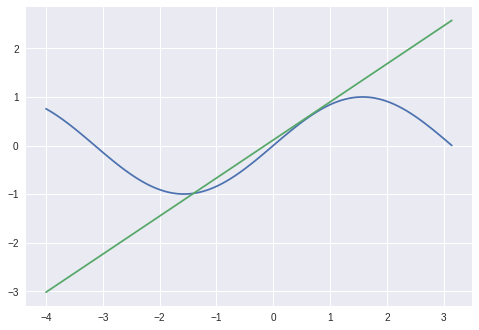

In [2]:
from sympy import *
import numpy as np
x = symbols('x')
print(diff(sin(x)))

# numeric derivative of a function[f(x + 0.00001) - f(x)]/ 0.00001

def f(x):
  return cos(x)

print (f(1 + 0.00001) - f(1)/ 0.00001)
 
  
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, np.pi, 100)

sin_x = np.sin(x)
plt.plot(x,sin_x)
d_x = np.cos(0.67)
plt.plot(x, d_x*x + d_x - 0.67)

[[-7.  -5.  -3.  -1.   1.   3.   5.   7.   8. ]
 [ 4.   3.   1.5  0.3 -1.8 -3.  -4.  -4.1 -4. ]]
[[-7.   4. ]
 [-5.   3. ]
 [-3.   1.5]
 [-1.   0.3]
 [ 1.  -1.8]
 [ 3.  -3. ]
 [ 5.  -4. ]
 [ 7.  -4.1]
 [ 8.  -4. ]]


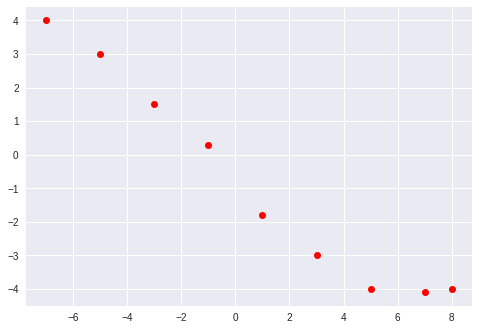

In [3]:
x = [-7,-5,-3,-1,1,3,5,7,8]
y = [4, 3, 1.5, 0.3, -1.8, -3, -4, -4.1, -4]

y = np.matrix([[-7, -5, -3, -1, 1, 3, 5, 7, 8],[4, 3, 1.5, 0.3, -1.8, -3, -4, -4.1, -4]])
print(y)
print(y.T)
y = y.T

plt.plot(y[::,0:1:], y[::,1:2:],'ro')

[[-2.4]]


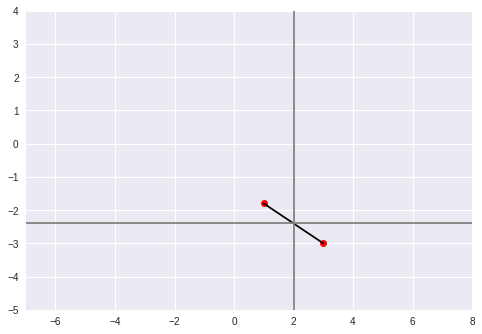

In [4]:
def interpolate(x,x_prime,fraction):
  # fraction must be between 0 and 1
  return fraction*(x - x_prime) + x_prime
  
m = np.matrix([[1,3],[-1.8,-3]]).T
plt.plot(m[::,0:1:],m[::,1:2:],'ro')
plt.plot(m[::,0:1:],m[::,1:2:],'black')
plt.xlim((-7,8))
plt.ylim((-5,4))
x_at = 2.0
plt.axvline(x_at,color="gray")

x_values = m[::,0:1:]
y_values = m[::,1:2:]


fraction = (x_at-x_values[0])/(x_values[1]-x_values[0])
y_interpolated = interpolate(y_values[0],y_values[1],fraction)



print(y_interpolated)
plt.axhline(y_interpolated,color="gray")

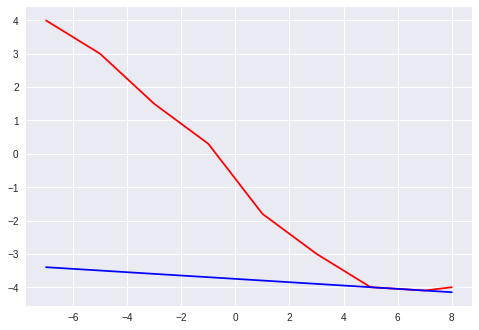

In [5]:
# Lets actually compute the finite difference

def d_f_x_finite_difference(x_array,f_x,at_x):
  upper = np.argmax(x_array>at_x) # = at_x
  lower = upper-1
  if(upper<=0):
    upper = 1
    lower = 0
  return ((f_x[upper]-f_x[lower])/(x_array[upper]-x_array[lower]))



# choose a value along x to compute the derivative
at_x = 6

# compute the derivative with d_f_x_finite_difference
d_x = d_f_x_finite_difference(y[::,0:1:],y[::,1:2:],at_x)

# interpolate the value of x at `at_x` because we don't have 
# a sample there
x_samples = y[::,0:1:]
y_samples = y[::,1:2:]

x_argm = np.argmax(x_samples>at_x)
x_upper = x_samples[x_argm]
x_lower = x_samples[x_argm-1]

fraction = (at_x-x_lower)/(x_upper-x_lower)
y_interpolated = interpolate(y_samples[x_argm-1],y_samples[x_argm],fraction)

# graph the derivative as a line of the form y = mx+b
mxb = d_x*x_samples.T - d_x*at_x+y_interpolated
mxb = np.matrix(mxb).T

plt.plot(y[::,0:1:],y[::,1:2:],'r')
plt.plot(y[::,0:1:],mxb,'b')
